In [60]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# notebook dir
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
print('notebook_dir', notebook_dir)

# config auto reload
%load_ext autoreload
%autoreload 2

notebook_dir /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
# model-based controller
SYS = 'quadrotor_2D_attitude'
controller = 'mpc_acados'
controller = 'linear_mpc_acados'
controller = 'ilqr'
controller = 'lqr'
controller = 'pid'
tag = 'downwash'
prior = f'results_{tag}_{SYS}'
data_folder_dir = f'../{controller}/{prior}'
# # GP-MPC
# controller = 'gpmpc_acados_TP'
# # tag = 'dw_h=1dot5'
# # tag = 'dw_h=2dot5'
# tag = 'dw_h=4'
# prior = f'_100_200_{tag}_downwash_quadrotor_2D_attitude'
# data_folder_dir = f'../{controller}/results/{prior}'
# controller = 'ilqr'
max_seed = 9
metric_name = 'metrics.txt'
s = 2 # times std
obs_dim = 6

if tag == 'dw_h=1dot5':
    max_dw_force = 0.33 # [N]
elif tag == 'dw_h=2dot5':
    max_dw_force = 0.035 # [N]
elif tag == 'dw_h=4':
    max_dw_force = 0.008 # [N]


# get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_color = {'ilqr': 'slateblue', 
              'lqr': 'blueviolet',
              'gpmpc_acados_TP': colors[0], 
              'mpc_acados':colors[-1], 
              'linear_mpc_acados':"green",
              'fmpc': "darkblue",
              'pid': 'tab:gray',
              } 

In [62]:


# find the folder in the dir
seed_data_folder = os.listdir(os.path.join(notebook_dir, data_folder_dir))
print('seed_data_folder', seed_data_folder)
seed_data_folder = [f for f in seed_data_folder if os.path.isdir(os.path.join(data_folder_dir, f))]
seed_data_folder = sorted(seed_data_folder, key=lambda x: int(x.split('_')[1]))
# print('seed_data_folder', seed_data_folder)
print('max seed', max_seed)
seed_data_folder = [seed_data_folder[i]+'/temp' for i in range(max_seed)]
# seed_data_folder = seed_data_folder[:9]
print('seed_data_folder', seed_data_folder)
seed_data_folder = [os.path.join(data_folder_dir, f) for f in seed_data_folder]
print('seed_data_folder', seed_data_folder)

seed_data_folder ['seed_8', 'seed_4', 'seed_10', 'seed_9', 'seed_1', 'seed_3', 'seed_2', 'seed_5', 'seed_6', 'seed_7']
max seed 9
seed_data_folder ['seed_1/temp', 'seed_2/temp', 'seed_3/temp', 'seed_4/temp', 'seed_5/temp', 'seed_6/temp', 'seed_7/temp', 'seed_8/temp', 'seed_9/temp']
seed_data_folder ['../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_2/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_3/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_4/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_5/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_6/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_7/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_8/temp', '../pid/results_downwash_quadrotor_2D_attitude/seed_9/temp']


In [63]:

results = {}

for seed in range(0, max_seed):
    results[repr(seed)] = {}
    rmse_list = []
    early_stop_list = []
    noise_factor_list = []
    traj_data_list = []
    traj_steps_list = []
    # fild runs
    load_seed_dir = seed_data_folder[seed]
    runs_data_folder = os.listdir(os.path.join(notebook_dir, load_seed_dir))
    runs_data_folder = [os.path.join(load_seed_dir, f) for f in runs_data_folder]
    # sort the runs
    runs_data_folder = sorted(runs_data_folder)
    print('runs_data_folder', runs_data_folder)
    for runs in runs_data_folder:
        # load the metric file in the folder
        metric_file = os.path.join(runs, metric_name)
        # print('metric_file', metric_file)
        data = pd.read_csv(metric_file, delimiter=':')
        # convert to numpy
        data = data.to_numpy()
        # print(data)
        # convert to dictionary
        data = {data[i][0]: data[i][1] for i in range(len(data))}

        # noise_factor = eval(data['noise_factor'])
        noise_factor = eval(data['max_dw_force'])
        rmse = eval(data['rmse'])
        early_stop = eval(data['early_stop'])
        rmse_list.append(rmse)
        early_stop_list.append(early_stop)
        noise_factor_list.append(noise_factor)

        # load the traj
        traj_file = os.path.join(runs, f'{controller}_data_quadrotor_traj_tracking.pkl')
        traj_data = pd.read_pickle(traj_file)
        traj_data = traj_data['trajs_data']['obs'][0]
        traj_steps = len(traj_data)
        traj_data_list.append(traj_data)
        traj_steps = len(traj_data)
        traj_steps_list.append(traj_steps)
    
    results[repr(seed)]['rmse'] = rmse_list
    results[repr(seed)]['early_stop'] = early_stop_list
    results[repr(seed)]['noise_factor'] = noise_factor_list
    # results[repr(seed)]['traj_data'] = traj_data_list
    results[repr(seed)]['traj_steps'] = traj_steps_list

max_noise_factor = max([max(results[repr(seed)]['noise_factor']) for seed in range(max_seed)])


runs_data_folder ['../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-55-09_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-55-18_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-55-27_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-55-36_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-55-45_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-55-53_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-56-02_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-56-11_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-56-20_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-00-56-29_d5f4f4f', '../pid/results_downwash_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-06-

In [64]:
traj_data.shape

(661, 6)

In [65]:
# 

In [66]:
# results[repr(1)]['traj_steps']
# results.keys

# results_file_name = f'{notebook_dir}/../data/noise_results_{controller}.npy'
# np.save(results_file_name, results)
# print(f'saved {notebook_dir}/{results_file_name}')


In [67]:
results[repr(1)]['rmse']

[0.19020918580102375,
 0.12714961581975953,
 0.12605602005268327,
 0.12042148228381674,
 0.11751570913335656,
 0.11604522241459753,
 0.1152931067955187,
 0.11488339901621199,
 0.11465020345606229,
 0.11452137992237717,
 0.1144349420694053,
 0.11437107294797391,
 0.11432531209857122]

In [68]:
# for seed in range(max_seed):
#     for j in range(len(results[repr(seed)]['rmse'])):
#         results[repr(seed)]['rmse'][j] = 0.8 * results[repr(seed)]['rmse'][j]


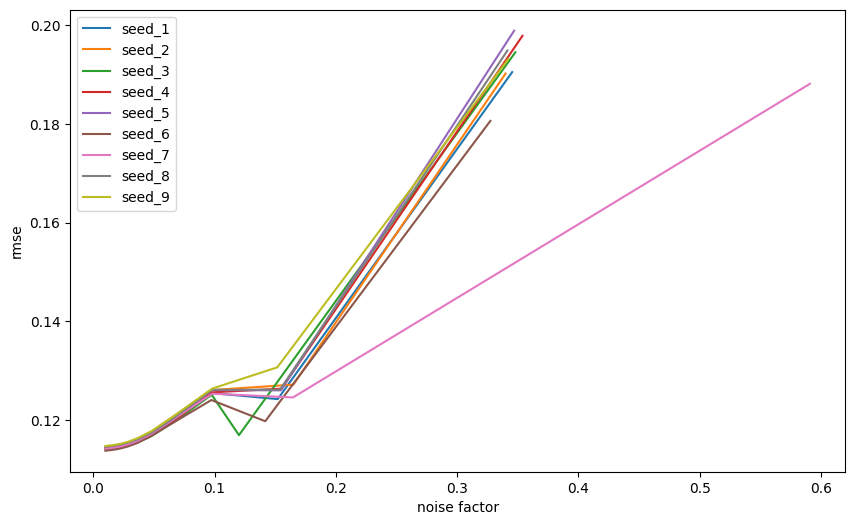

In [69]:
# plot the results
# x axis noise factor
# y axis rmse
fig, ax = plt.subplots(figsize=(10, 6))
for seed in range(max_seed):
    ax.plot(results[repr(seed)]['noise_factor'], results[repr(seed)]['rmse'], label=f'seed_{seed+1}')
ax.set_xlabel('noise factor')
ax.set_ylabel('rmse')
ax.legend()

In [70]:
results[repr(1)]['traj_steps']
results.keys

results_file_name = f'{notebook_dir}/../data/{tag}_results_{controller}.npy'
np.save(results_file_name, results)
print(f'saved {notebook_dir}/{results_file_name}')

saved /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting//home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting/../data/downwash_results_pid.npy


In [71]:
# early stop
# results[repr(seed)]['early_stop']
# merge all the early stop
num_noise_factor = len(results[repr(seed)]['noise_factor'])
# print('num_noise_factor', num_noise_factor)
# early_stop_results = [False for _ in range(num_noise_factor)]
# print('early_stop_results', early_stop_results)
# print('len(early_stop_results)', len(early_stop_results))
# for seed in range(max_seed):
#     for i in range(len(results[repr(seed)]['noise_factor'])):
#         early_stop_results[i] = early_stop_results[i] or results[repr(seed)]['early_stop'][i]
# print('early_stop_results', early_stop_results)
# find the first early stop
# if True in early_stop_results:
#     first_early_stop = early_stop_results.index(True)
#     early_stop_noise_factor = results[repr(seed)]['noise_factor'][first_early_stop]
# else:
#     print('no early stop')
#     first_early_stop = None
#     early_stop_noise_factor = None
# print('first_early_stop', first_early_stop)
# print('early_stop_noise_factor', early_stop_noise_factor)

0.19208752425553746

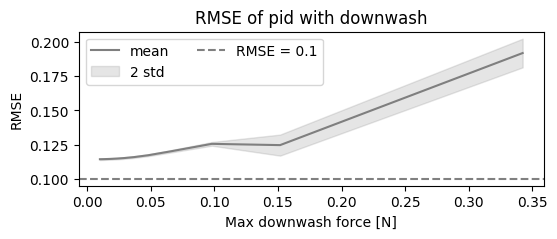

In [72]:
mean_rmse = np.mean([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)
std_rmse = np.std([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(results[repr(seed)]['noise_factor'], mean_rmse, 
        label='mean', color=plot_color[controller])
ax.fill_between(results[repr(seed)]['noise_factor'], mean_rmse- s*std_rmse, mean_rmse+ s*std_rmse, 
                alpha=0.2, label=f'{s} std', color=plot_color[controller])

# plot shaded area for the first early stop
# ax.axvspan(early_stop_noise_factor, max_noise_factor, color='red', alpha=0.1, label='early stop')

# ax.set_xlim([1, max_noise_factor])
# ax.set_ylim([0, None])
# explicitly show the tick from 1 to the max noise factor
# noise_ticks = [i for i in range(20, max_noise_factor+1, 20)]
# append 1 at the beginning
# noise_ticks = [1] + noise_ticks
# ax.set_xticks(noise_ticks)
# plot y line at 0.1
ax.axhline(y=0.1, color='gray', linestyle='--', label='RMSE = 0.1')
ax.legend(ncol=2)
ax.set_xlabel('Max downwash force [N]')
ax.set_ylabel('RMSE')
ax.set_title(f'RMSE of {controller} with {tag}')

# save the plot
plot_file_name = f'{notebook_dir}/../data/{tag}_rmse_{controller}.png'
plt.savefig(plot_file_name)

mean_rmse[0]

In [73]:

# traj_results = {}
# for seed in range(max_seed):
#     # re-arrange the traj data to be in shape (noise_factor, max_steps, obs_dim)
#     for i in range(1, max_noise_factor, 20):
#         traj_data = np.zeros((len(traj_data_list), max_steps, obs_dim))
#         for i in range(len(traj_data_list)):
#             traj_data[i] = traj_data_list[i]
#     traj_results[repr(seed)] = results[repr(seed)]['traj_data']


#     for i in range(0, len(traj_data), 40):
#         ax.plot(traj_data[:, 0], traj_data[:, 2], label=f'seed_{seed+1}')
# fig, ax = plt.subplots(figsize=(10, 6))
# # plot the traj every 40 noise factor